<a href="https://colab.research.google.com/github/sePerezAlbor/LAB1_EDD2_202330/blob/main/LAB_1_DATOS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LABORATORIO 1.**
**Integrantes:**
*  Kanery Marcela Camargo Rodríguez
*  Emanuel de Jesús Carbonell Naranjo.
*  Sebastián Alfonso Pérez Albor.

###  **LIBRERIAS.**

In [136]:
#!apt-get install -y graphviz-dev
#!pip install pygraphviz
import pygraphviz as pgv
from PIL import Image
from IPython.display import Image, display
from typing import Any, List, Optional,Tuple
import pandas as pd

###  **CLASE COLA.**

In [137]:
class Queue:
    def __init__(self, size: int) -> None:
        self.queue: List[Any] = []
        self.size = size


    def __repr__(self) -> str:
        return str(self.queue)

    def __len__(self) -> int:
        return len(self.queue)

    def add(self, elem: int) -> None:
        if len(self.queue) >= self.size:
            raise ValueError('The Queue is full')

        self.queue.append(elem)

    def is_empty(self) -> bool:
        return len(self.queue) == 0

    def reversed_queue(self):
        if not self.queue:
            raise ValueError('The Queue is empty')

        queue_aux = Queue(len_rr := len(self.queue))
        for _ in range(len_rr):
            val_aux = self.queue.pop()
            queue_aux.add(val_aux)
        self.queue = queue_aux
        del(queue_aux,len_rr)

    def remove(self) -> int:
        if not self.queue:
            raise ValueError('The Queue is empty')

        return self.queue.pop(0)

### **NODO AVL**

In [138]:
metricas_asignadas = []                                     # Lista para guardar metricas asignadas
metricas_repetidas = []                                     # Lista para guardar metricas repetidas
class NodoAVL:
    def __init__(self,
                 titulo:str,
                 departamento: str,
                 ciudad: str,
                 tipo_inmueble: str,
                 latitud: float,
                 longitud:float,
                 superficie_total: float,
                 superficie_cubierta: float,
                 cuartos: float,
                 banos:float,
                 tipo_operacion: str,
                 precio: float
                 ) -> None:


        metrica = round(precio/superficie_total)
        self.metrica_repetida = False
        self.metrica_original = metrica
        ciclo = 0
        while (metrica in metricas_asignadas):
            if ciclo == 0:
                metricas_repetidas.append(metrica)
                self.metrica_repetida = True
            metrica += cuartos                              # Segunda metrica es la primera mas el número de cuartos, solo en caso de que la primera ya haya sido asignada
            ciclo   += 1


        metricas_asignadas.append(metrica)

        self.metrica = metrica                              # Primera metrica
        self.izquierda: Optional['NodoAVL'] = None          # Hijo izquierdo
        self.derecha: Optional['NodoAVL'] = None            # Hijo derecho
        self.altura = 1                                     # Inicialmente, la altura del nodo es 1

        self.info = {
            'titulo': titulo,                               # Titulo del inmueble
            'departamento': departamento,                   # Departamento del inmueble
            'ciudad': ciudad,                               # Ciudad del inmueble
            'tipo_inmueble': tipo_inmueble,                 # Tipo de inmueble
            'latitud': latitud,                             # Latitud del inmueble
            'longitud': longitud,                           # Longitud del inmueble
            'superficie_total': superficie_total,           # Superficie total del inmueble
            'superficie_cubierta': superficie_cubierta,     # Superficie cubierta del inmueble
            'cuartos': cuartos,                             # Cuartos del inmueble
            'banos': banos,                                 # Baños del inmueble
            'tipo_operacion': tipo_operacion,               # Tipo de operacion del inmueble
            'precio': precio                                # Precio del inmbuele
        }


### **ÁRBOL AVL Y LOS RESPECTIVOS MÉTODOS USADOS.**

In [139]:
class ArbolAVL:
    def __init__(self):
        self.raiz = None

    def altura(self, nodo):
        if nodo is None:
            return 0
        return nodo.altura


    def actualizar_altura(self, nodo):
        nodo.altura = 1 + max(self.altura(nodo.izquierda), self.altura(nodo.derecha))

    def rotacion_derecha(self, y):
        x = y.izquierda
        t2 = x.derecha

        x.derecha = y
        y.izquierda = t2
        self.actualizar_altura(y)
        self.actualizar_altura(x)

        return x

    def rotacion_izquierda(self, x):
        y = x.derecha
        t2 = y.izquierda

        y.izquierda = x
        x.derecha = t2
        self.actualizar_altura(x)
        self.actualizar_altura(y)

        return y

    def balance(self, nodo):
        if nodo is None:
            return 0
        return self.altura(nodo.izquierda) - self.altura(nodo.derecha)

    def __insertar(self, nodo, nuevo_nodo):
        if nodo is None:
            return nuevo_nodo

        if nuevo_nodo.metrica < nodo.metrica:
            nodo.izquierda = self.__insertar(nodo.izquierda, nuevo_nodo)
        else:
            nodo.derecha = self.__insertar(nodo.derecha, nuevo_nodo)

        self.actualizar_altura(nodo)

        factor_balance = self.balance(nodo)

        # Caso izquierda
        if factor_balance > 1 and nuevo_nodo.metrica < nodo.izquierda.metrica:
            return self.rotacion_derecha(nodo)

        # Caso derecha
        if factor_balance < -1 and nuevo_nodo.metrica > nodo.derecha.metrica:
            return self.rotacion_izquierda(nodo)

        # Caso izquierda-derecha
        if factor_balance > 1 and nuevo_nodo.metrica > nodo.izquierda.metrica:
            nodo.izquierda = self.rotacion_izquierda(nodo.izquierda)
            return self.rotacion_derecha(nodo)

        # Caso derecha-izquierda
        if factor_balance < -1 and nuevo_nodo.metrica < nodo.derecha.metrica:
            nodo.derecha = self.rotacion_derecha(nodo.derecha)
            return self.rotacion_izquierda(nodo)

        return nodo

    def insertar(self, nuevo_nodo):
        self.raiz = self.__insertar(self.raiz, nuevo_nodo)

    def preorden(self, nodo):
        if nodo:
            print(nodo.metrica, end=" ")
            self.preorden(nodo.izquierda)
            self.preorden(nodo.derecha)

    def imprimir_preorden(self):
        self.preorden(self.raiz)


    def eliminar(self, nodo, metrica):
        if nodo is None:
            return nodo

        if metrica < nodo.metrica:
            nodo.izquierda = self.eliminar(nodo.izquierda, metrica)
        elif metrica > nodo.metrica:
            nodo.derecha = self.eliminar(nodo.derecha, metrica)
        else:
            if nodo.izquierda is None:
                temp = nodo.derecha
                nodo = None
                return temp
            elif nodo.derecha is None:
                temp = nodo.izquierda
                nodo = None
                return temp

            temp = self.minimo_nodo(nodo.derecha)
            nodo.metrica = temp.metrica
            nodo.derecha = self.eliminar(nodo.derecha, temp.metrica)

        self.actualizar_altura(nodo)

        balance = self.balance(nodo)

        # Casos de balanceo similares a la inserción
        if balance > 1 and self.balance(nodo.izquierda) >= 0:
            return self.rotacion_derecha(nodo)

        if balance < -1 and self.balance(nodo.derecha) <= 0:
            return self.rotacion_izquierda(nodo)

        if balance > 1 and self.balance(nodo.izquierda) < 0:
            nodo.izquierda = self.rotacion_izquierda(nodo.izquierda)
            return self.rotacion_derecha(nodo)

        if balance < -1 and self.balance(nodo.derecha) > 0:
            nodo.derecha = self.rotacion_derecha(nodo.derecha)
            return self.rotacion_izquierda(nodo)

        return nodo

    def eliminar_por_metrica(self, metrica):
        self.raiz = self.eliminar(self.raiz, metrica)

    def graficar_arbol(self):
        graph = pgv.AGraph(directed=True)

        # Función recursiva para agregar nodos y aristas al gráfico
        def agregar_nodos_y_aristas(nodo, padre=None):
            if nodo:
                # Agrega el nodo actual al gráfico
                etiqueta = f"Ciudad: {nodo.info['ciudad']}\nTipo: {nodo.info['tipo_inmueble']}\nPrecio: {int(nodo.info['precio']):,} $\nSuperficie Total: {nodo.info['superficie_total']} m2\nCuartos: {int(nodo.info['cuartos'])}\nMétrica: {int(nodo.metrica_original):,} $/m2"

                graph.add_node(nodo.metrica, label= etiqueta)

                # Si hay un padre, agrega una arista desde el padre al nodo actual
                if padre:
                    graph.add_edge(padre.metrica, nodo.metrica)

                # Llama recursivamente a la función para los hijos izquierdo y derecho
                agregar_nodos_y_aristas(nodo.izquierda, nodo)
                agregar_nodos_y_aristas(nodo.derecha, nodo)

        agregar_nodos_y_aristas(self.raiz)

        display(Image(data=graph.draw(format='png', prog='dot')))


### **IMPORTAR LA BASE DE DATOS.**

In [140]:
propietarios = pd.read_csv("propietarios.csv")
#propietarios.columns = ['TITULO','DEPARTAMENTO','CIUDAD','TIPO_INMUEBLE','LATITUD','LONGITUD','SUPERFICIE_TOTAL','SUPERFICIE_CUBIERTA','CUARTOS','BAÑOS','TIPO_OPERACION','PRECIO']
#propietarios

### **CREAR EL ARBOL**

In [141]:
arbol_propietarios = ArbolAVL()
matriz_proprietarios = propietarios.values.tolist()
for fila in matriz_proprietarios:
    nodo = NodoAVL(fila[0],fila[1],fila[2],fila[3],fila[4],fila[5],fila[6],fila[7],fila[8],fila[9],fila[10],fila[11])
    arbol_propietarios.insertar(nodo)

### **GRAFICAR EL ARBOL.**

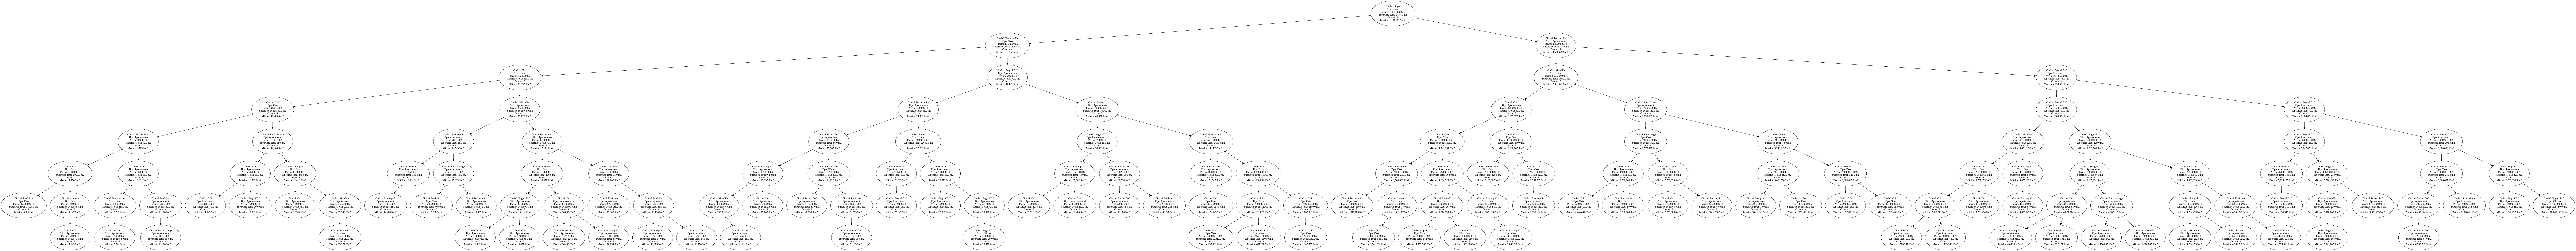

In [144]:
arbol_propietarios.graficar_arbol()